<a href="https://colab.research.google.com/github/sohenney/2025-1_CV/blob/main/HW_2_8_2021025030_%EC%9D%B4%EC%86%8C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

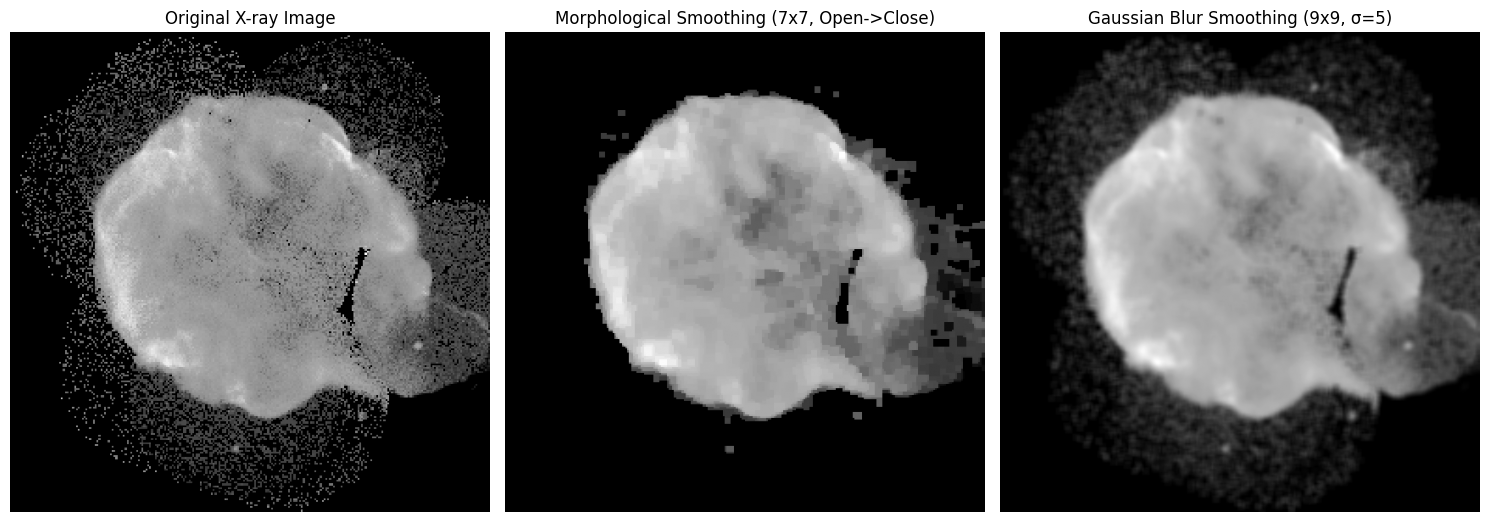

In [ ]:
import cv2  # 이미지 처리용 OpenCV 모듈
import numpy as np  # 수학적 계산과 배열을 다루는 NumPy
import matplotlib.pyplot as plt  # 시각화를 위한 Matplotlib
import urllib.request  # URL에서 이미지를 다운로드하기 위한 urllib

# 이미지 URL 정의
image_url = 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif'

# URL에서 이미지를 로드하는 함수 정의
def load_image(url):
    import urllib.request  # URL 요청을 위한 urllib 모듈
    with urllib.request.urlopen(url) as response:
        img_data = np.asarray(bytearray(response.read()), dtype=np.uint8)  # 바이트 배열로 변환
    return cv2.imdecode(img_data, cv2.IMREAD_GRAYSCALE)  # 그레이스케일로 디코딩

# 이미지를 불러오기
xray_img = load_image(image_url)

# 1. Morphological Smoothing (노이즈 제거 개선)
#    - 커널 크기를 7x7로 확대하여 더 넓은 영역의 잡음을 제거함.
#    - Closing (팽창 후 침식) 연산 후 Opening (침식 후 팽창) 연산을 하였더니 노이즈가 더 확대되어
#    - 순서를 바꿔 Opening (침식 후 팽창) 연산을 먼저 적용하여 작은 밝은 잡음을 제거하고 이어서 Closing (팽창 후 침식) 연산을 적용하여 작은 어두운 구멍을 채움.
morph_kernel_large = np.ones((7, 7), np.uint8)  # 7x7 크기의 구조 요소 생성
smoothed_morph = cv2.morphologyEx(xray_img, cv2.MORPH_OPEN, morph_kernel_large)
smoothed_morph = cv2.morphologyEx(smoothed_morph, cv2.MORPH_CLOSE, morph_kernel_large)

# 2. Smoothing Filter - Gaussian Blur 적용
#    - Gaussian Blur의 커널 크기를 (9, 9)로 확대하고, 시그마 값을 5로 설정하여 평활화 효과를 강화하고 잔여 노이즈를 더욱 줄임.
gaussian_smooth = cv2.GaussianBlur(xray_img, (9, 9), 5)

# 결과 시각화를 위한 출력
plt.figure(figsize=(15, 10))

# 원본 X-ray 이미지
plt.subplot(1, 3, 1)
plt.imshow(xray_img, cmap='gray')
plt.title("Original X-ray Image")
plt.axis('off')  # 축 숨기기

# 개선된 Morphological Smoothing 결과
plt.subplot(1, 3, 2)
plt.imshow(smoothed_morph, cmap='gray')
plt.title("Morphological Smoothing (7x7, Open->Close)")
plt.axis('off')  # 축 숨기기

# Gaussian Blur Smoothing 결과 (향상된 파라미터 적용)
plt.subplot(1, 3, 3)
plt.imshow(gaussian_smooth, cmap='gray')
plt.title("Gaussian Blur Smoothing (9x9, σ=5)")
plt.axis('off')  # 축 숨기기

plt.tight_layout()  # 서브플롯 간격 자동 조정
plt.show()


# ### 결과 분석 ###
#
# 1. Morphological Smoothing:
#    - 대신 7x7 커널을 사용함으로써 더 넓은 영역의 노이즈(작은 구멍이나 산발적인 잡음)를 효과적으로 제거할 수 있음.
#    - 처음에는 Closing (팽창 후 침식) 연산 후 Opening (침식 후 팽창) 연산을 하였더니 노이즈가 더 확대되어
#    - 순서를 바꿔 Opening (침식 후 팽창) 연산을 먼저 적용하여 작은 밝은 잡음을 제거하고 이어서 Closing (팽창 후 침식) 연산을 적용하여 작은 어두운 구멍을 채움.
#
# 2. Smoothing Filter (Gaussian Blur):
#    - Gaussian Blur의 커널 크기를 (9, 9)로 확대하고, 시그마 값(σ)을 5로 설정하여 일반적인 평활화 효과를 강화함.
#    - 결과적으로 기존에 보이던 잔여 노이즈가 크게 줄어들면서 이미지의 대략적인 구조는 어느 정도 보존됨.
#    - 하지만 노이즈만 줄이기 위해서 사용한 Gaussian Blur가 노이즈를 포함한 주요 이미지를 함께 흐리게 만들기 때문에 이 원본 이미지에 대해서는 적절하지 않아보임.
#
#    - Morphological Smoothing은 구조적인 형태를 보존하면서도 불필요한 작은 노이즈들을 제거하는 데 효과적임.
#    - Gaussian Blur는 전체적인 평활화 효과를 통해 노이즈를 줄이나 경우에 따라 중요한 경계 정보도 다소 손실될 수 있음.
#    서로 다른 방법들이 적용된 결과를 비교함으로써 특정 상황(예: 원본 사진과 같은 X-ray 이미지 전처리)에서 어떤 방법이 더 적합한지 분석할 수 있음.